Stock Prediction Using LSTM
It's a type of Recurrent Neural Network (RNN)

How Does LSTM Work?
An LSTM network consists of memory blocks called cells. Each cell has three gates:

1.Input Gate: Controls how much new information flows into the cell.

2.Forget Gate: Decides what information to discard from the cell.

3.Output Gate: Determines what information to output from the cell.



**Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import yfinance as yf


**Load Stock Data**

In [ ]:
# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data for this ticker
data = yf.download(tickerSymbol, start='2012-01-01', end='2023-10-01')

# Display the first five rows
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402626,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469278,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607714,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400


**Visualize the Closing Price History**

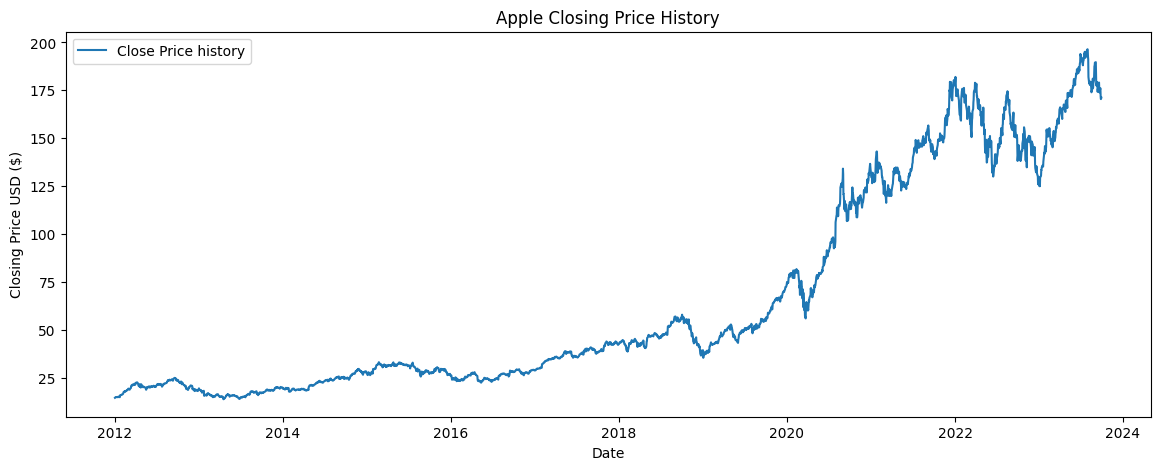

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(data['Close'], label='Close Price history')
plt.title('Apple Closing Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')
plt.legend()
plt.show()


**Filter the Closing Prices**

In [ ]:
close_prices = data['Close']


**Convert to Numpy Array**

In [ ]:
dataset = close_prices.values

**Normalize the Data**

LSTMs are sensitive to the scale of the data, so we apply Min-Max scaling.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))


**Split into Training and Testing Sets**

In [ ]:
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]  # 60 is the window size


**Create Sequences**

In [ ]:
def create_dataset(dataset, window_size=60):
    X, y = [], []
    for i in range(window_size, len(dataset)):
        X.append(dataset[i - window_size:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)


**Reshape the Data**

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


**Build the LSTM Model**

In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compile the Model**

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


**Train the Model**

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0106 - val_loss: 0.0012
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 3.0505e-04 - val_loss: 0.0012
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 1.9152e-04 - val_loss: 0.0012
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 1.8194e-04 - val_loss: 0.0012
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 1.5789e-04 - val_loss: 0.0011
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 1.5702e-04 - val_loss: 0.0016
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 1.7331e-04 - val_loss: 0.0014
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 1.5253e-04 - val_loss: 9.8088e-04
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 1.7541e-04 - val_loss: 0.0012
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.6129e-04 - val_loss: 0.0012


**Evaluate the Model**

Predict the Prices

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


Calculate RMSE

In [ ]:
rmse = np.sqrt(np.mean(((predictions - scaler.inverse_transform(y_test.reshape(-1, 1))) ** 2)))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 6.267663066215033


Visualize the Results

<ipython-input-15-69b4d55c8635>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


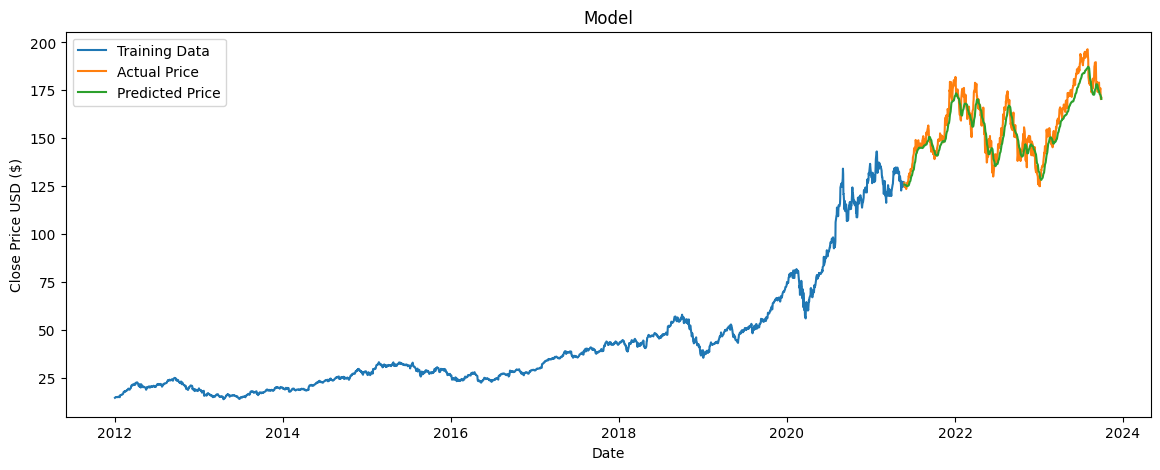

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14,5))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close']], label='Actual Price')
plt.plot(valid[['Predictions']], label='Predicted Price')
plt.legend()
plt.show()


**Conclusion**

We've built an LSTM model to predict Apple's stock prices using historical data. While the model captures general trends, stock price prediction is inherently uncertain due to market volatility and unforeseen events. Always exercise caution and do thorough research before making investment decisions.